In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv('Youth opinions about SMU as an Intergenerational Hub.csv')
#print(train_data.head())
print("\nNumber of records in train  : ", len(train_data))

for column in train_data:
    dt = train_data[column].dtype 
    if dt == int or dt == float:
        train_data[column] = train_data[column].fillna(0)
    else:
        train_data[column] = train_data[column].fillna("-")
    
    
train_data.shape


Number of records in train  :  75


(75, 20)

In [4]:
train_data.sample(5)

,Gender,Faculty/School,Are you an Undergraduate or a Postgraduate?,Year,Have you cleared your Community Service Programme (CSP) requirement?,How did you clear your CSP requirement? Please give a short description.,How are you planning to clear your CSP requirement?,Do you often see elderly in SMU or around SMU?Rate from 1 to 4 where 1 - Not at all and 4 - Very often - Frequency of seeing elderly in SMU or around SMU,"From your observation, what do the elderly usually do in SMU or around SMU?",Do you know that there are many elderly living near SMU such as Bras Basah Complex and Waterloo area?,"Other than your grandparents, how often do you interact with the elderly?Rate from 1 to 4 where 1 - Not at all and 4 - Very often - Frequency of interacting with elderly",Do you face any difficulties interacting with elderly?,What difficulties do you face?,Are you interested to participate in a local CSP at elderly centres?,What do you think about developing SMU and the area around it as an Intergenerational Hub? Our Vision of Intergenerational Hub: Elderly coming to SMU and facilities are available to promote healthy and active ageing as well as promote intergenerational interaction between elderly and youth.,Please elaborate for your choice in the previous question.,What benefits do you think SMU will get for branding itself as an Intergenerational Hub for youth and the elderly?,Do you think this Intergenerational Hub initiative will disrupt students' daily lives?,Please elaborate for your choice in the previous question..1,Are you interested to participate in local CSPs which are to be conducted in SMU or around SMU?Rate from 1 to 4 where 1 - Not at all and 4 - Very interested - Interest level
59,Male,School of Social Sciences,Undergraduate,Year 4,Yes,"CSP Camp, School Project",-,2,-,Yes,1,No,-,No,That's good!,Had always believed that intergenerational ini...,Unique value proposition as a university. Seen...,Yes,Only in terms of facilities utilisation as SMU...,2
17,Female,School of Accountancy,Undergraduate,Year 2,Yes,Starring. Kidsreads and art festival,-,4,Sleep and take break and when cleaning,No,2,No,-,No,That's an excellent idea!,Is always good to initiate such csp. With righ...,Yes,Yes,If having it for branding i dont find it a goo...,2
10,Male,School of Information Systems,Undergraduate,Year 4,Yes,School csp,-,3,As cleaners,Yes,1,No,-,Yes,Not bad,Don't see why not,Not sure,No,There's plenty of space,2
23,Male,School of Accountancy,Undergraduate,Year 2,Yes,Local volunteering,-,2,-,Yes,2,Yes,Language,No,That's good!,Central location near to offices,Better reputation,No,There might be spillover effects where the stu...,3
7,Male,School of Information Systems,Undergraduate,Year 2,Yes,"Self-sourced, at an elderly care facility.",-,1,-,No,2,No,-,Yes,That's good!,I think it's good because most CSPs I noticed ...,That we look out for our pioneer generation.,No,Depends on where it is I guess.,4


In [5]:
train_data.columns = ['gender','faculty','UG/PG','year','csp_cleared','clearcsp_method',
              'clearcsp_plan','freq_see_elderly','elderly_insmu_do','knowledge_elderly_stay_brasbasah','freq_interact_w_elderly',
              'difficulties_interacting','difficulties_face_interacting','interest_participate_elderly_center_csp','thoughts_intergenerational_hub','further_thoughts','branding_smu',
              'disrupt_student_lives','disrupt_reason','interest_csp_elderly_smu']

train_data['csp_cleared'] = (train_data['csp_cleared'] == 'Yes' ).astype(int)
print(train_data['csp_cleared'].value_counts())

train_data['knowledge_elderly_stay_brasbasah'] = (train_data['knowledge_elderly_stay_brasbasah'] == 'Yes' ).astype(int)
print(train_data['knowledge_elderly_stay_brasbasah'].value_counts())

train_data['difficulties_interacting'] = (train_data['difficulties_interacting'] == 'Yes' ).astype(int)
print(train_data['difficulties_interacting'].value_counts())

train_data['interest_participate_elderly_center_csp'] = (train_data['interest_participate_elderly_center_csp'] == 'Yes' ).astype(int)
print(train_data['interest_participate_elderly_center_csp'].value_counts())


train_data['disrupt_student_lives'] = (train_data['disrupt_student_lives'] == 'Yes' ).astype(int)
print(train_data['disrupt_student_lives'].value_counts())


#Encode the thoughts on intergenerational hub
def encode_score(data):
    if data == "That's an excellent idea!":
        return 4
    if data == "That's good!":
        return 3
    if data == "Not bad":
        return 2
    if data == "Don't really feel good about it":
        return 1
    if data == "No way!":
        return 0


train_data['thoughts_intergenerational_hub'] = train_data['thoughts_intergenerational_hub'].apply(encode_score)
train_data['thoughts_intergenerational_hub'] = train_data['thoughts_intergenerational_hub'].astype(int)

    
def remove_year_text(data):
    if data == "-":
        return 0
    data = data.replace("Year","")
    data = int(data)
    return data

train_data["year"] = train_data["year"].apply(remove_year_text)
train_data["year"] = train_data["year"].astype(int)


train_data.sample(5)

1    43
0    32
Name: csp_cleared, dtype: int64
0    44
1    31
Name: knowledge_elderly_stay_brasbasah, dtype: int64
0    41
1    34
Name: difficulties_interacting, dtype: int64
1    48
0    27
Name: interest_participate_elderly_center_csp, dtype: int64
0    56
1    19
Name: disrupt_student_lives, dtype: int64


,gender,faculty,UG/PG,year,csp_cleared,clearcsp_method,clearcsp_plan,freq_see_elderly,elderly_insmu_do,knowledge_elderly_stay_brasbasah,freq_interact_w_elderly,difficulties_interacting,difficulties_face_interacting,interest_participate_elderly_center_csp,thoughts_intergenerational_hub,further_thoughts,branding_smu,disrupt_student_lives,disrupt_reason,interest_csp_elderly_smu
61,Female,School of Business,Undergraduate,2,1,Rotaract 80 hours bundle,-,1,-,0,3,0,-,1,3,I think it is good to bridge the gap,-,0,SMU is big and students can manage with good t...,1
44,Female,School of Accountancy,Undergraduate,2,0,-,Probably volunteering,2,-,0,1,0,-,1,2,-,Very good,0,-,4
45,Female,School of Business,Undergraduate,4,1,Through local CSP,-,4,"Cleaners, Security guards and many homeless on...",1,2,0,-,1,3,"Hmm, I guess it really depends. Sometimes it m...",Hm... Not sure why need to brand itself as an ...,0,"Hmm why would it though. If one cares enough, ...",3
17,Female,School of Accountancy,Undergraduate,2,1,Starring. Kidsreads and art festival,-,4,Sleep and take break and when cleaning,0,2,0,-,0,4,Is always good to initiate such csp. With righ...,Yes,1,If having it for branding i dont find it a goo...,2
7,Male,School of Information Systems,Undergraduate,2,1,"Self-sourced, at an elderly care facility.",-,1,-,0,2,0,-,1,3,I think it's good because most CSPs I noticed ...,That we look out for our pioneer generation.,0,Depends on where it is I guess.,4


In [6]:
#train_data.sample(5)
elderly_related = train_data["clearcsp_method"]+ train_data["clearcsp_plan"]


In [7]:
words_related = "elderly|Inspirar|old folks"

count = elderly_related.str.contains(words_related).value_counts()[True]
print("Number of students who did/plans to do elderly related CSP: ",count)
print("Percentage/Probability of doing elderly related csp: ",round(count/len(elderly_related) * 100,2),'%')

might_be_words_related = "Uni-Y|uniy|uni-y|rotaract|Rotaract|silver|Silver"

count = elderly_related.str.contains(might_be_words_related).value_counts()[True]
print("Number of students who might have done or plan to do elderly related CSP: ",count)
print("Percentage/Probability who might have done or plan to do elderly related csp: ", round(count/len(elderly_related) * 100,2),'%')

def score_csp_elderly(data):
    words_related = ["elderly","Inspirar","old folks"]
    might_be_words_related = ["Uni-Y","uniy","uni-y","rotaract","Rotaract","Silver","silver"]
    if any(word in data for word in words_related):
        return 2
    elif any(word in data for word in might_be_words_related):
        return 1
    else:
        return 0

train_data["csp_elderly_related"] = elderly_related.apply(score_csp_elderly)

Number of students who did/plans to do elderly related CSP:  8
Percentage/Probability of doing elderly related csp:  10.67 %
Number of students who might have done or plan to do elderly related CSP:  6
Percentage/Probability who might have done or plan to do elderly related csp:  8.0 %


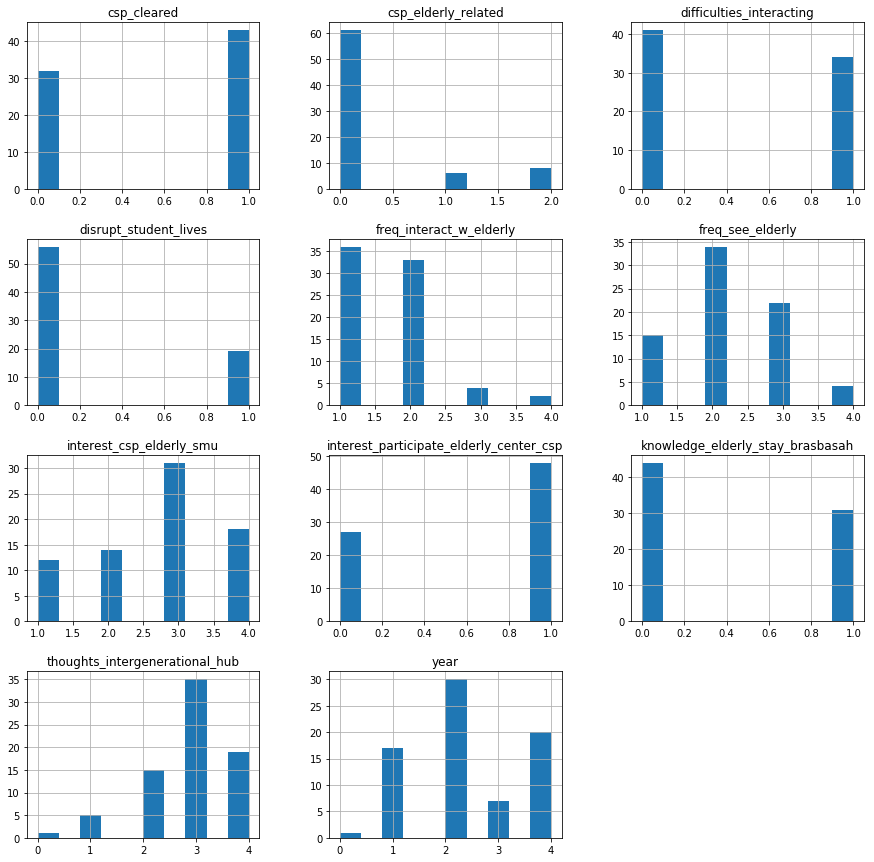

In [8]:
train_data.hist(bins=10, figsize=(15, 15), layout=(4, 3));

In [9]:
train_data.sample(35)

,gender,faculty,UG/PG,year,csp_cleared,clearcsp_method,clearcsp_plan,freq_see_elderly,elderly_insmu_do,knowledge_elderly_stay_brasbasah,...,difficulties_interacting,difficulties_face_interacting,interest_participate_elderly_center_csp,thoughts_intergenerational_hub,further_thoughts,branding_smu,disrupt_student_lives,disrupt_reason,interest_csp_elderly_smu,csp_elderly_related
51,Male,School of Accountancy,Undergraduate,2,1,red cross camp,-,3,survey as participant and cleaning,1,...,0,-,1,3,keep it up,inclusiveness,0,different location will not interrupt the stud...,3,0
74,Male,School of Economics,Undergraduate,4,1,"CSP camps x2, CSP project (local)",-,1,-,0,...,1,"Communication, common topics",0,4,There are many youth around the campus such as...,"Increased recognition in Singapore and abroad,...",1,Some spaces will definitely need to be repurpo...,3,0
48,Female,School of Business,Undergraduate,2,0,-,Idk :(,2,-,0,...,0,-,1,2,Nil,Nil,0,Nil,2,0
9,Male,School of Information Systems,Undergraduate,1,0,-,find local csp,2,-,0,...,1,no patience,0,1,they are gonna hog Koufu even more. and depend...,nothing much tbh. at most just get praised by ...,1,cause more crowds and traffic,1,0
42,Male,School of Economics,Undergraduate,4,1,I joined a local csp cca known as rotaract club,-,2,-,0,...,1,"Language barriers, generation gap",1,3,"most elderly seldom come to town area, this ma...",Promote cohesion between students and elderly,0,"As long as this policy is well organised, i th...",3,1
71,Male,School of Information Systems,Undergraduate,4,1,"StarringSMU participant, StarringSMU facilitator",-,3,Facilitate in cleanliness,0,...,0,-,1,3,Ability to bridge the gap between the elderly ...,Holistic education,0,"Out of class time, students may choose to pay ...",3,0
53,Female,School of Information Systems,Undergraduate,2,0,-,see which ocsp or csp accepts me,1,-,0,...,0,-,1,4,i find that more and more youths are becoming ...,caring university?,0,doing good never needs to take up too much time,1,0
1,Female,School of Social Sciences,Undergraduate,2,1,Local CSP with Caretalyst,-,2,-,0,...,0,-,1,1,Feels like it might slow down the pace of scho...,Inclusive school,0,It does not matter to students,3,0
40,Female,School of Information Systems,Undergraduate,4,1,SMU Challenge,-,1,-,0,...,1,Language barrier,1,3,-,CSR lol,0,Unless the elderly get obnoxious about owning ...,3,0
27,Female,School of Business,Undergraduate,1,0,-,I’m doing it right now in project SSUD2 from P...,3,I’ve seen some who are sleeping at the table i...,0,...,0,-,1,4,I think it’s great because these days ppl are ...,SMU will be seen as a bridge from elderly to y...,0,"No, we can make time to have fun, why can’t we...",2,0


In [10]:
train_data["csp_elderly_related"].sample(20)

21    0
48    0
24    0
72    0
49    0
25    2
27    0
56    0
23    0
39    0
8     2
47    1
74    0
18    0
55    0
66    0
22    0
1     0
70    0
6     0
Name: csp_elderly_related, dtype: int64

## VADER - Valence Aware Dictionary and Sentiment Reasoner
lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media

In [11]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

### SENTIMENT ANALYSIS

In [12]:
#function for sentiment analysis

def intensity_sentiment(data):
    intensity = {"sentence":[],"positive (%)":[],"neutral (%)":[],"negative (%)":[],"compound":[]}
    clean_data=[]
    x= train_data[str(data)]
    for i in x:
        if len(i)>4:
            clean_data.append(i)
    print(len(x))
    print(len(clean_data))
    
    for sentence in clean_data:
        score = analyser.polarity_scores(sentence)
        intensity['sentence'].append(sentence)
        intensity['positive (%)'].append(round(score['pos']*100))
        intensity['neutral (%)'].append(round(score['neu']*100))
        intensity['negative (%)'].append(round(score['neg']*100))
        intensity['compound'].append(score['compound'])
    
    result = pd.DataFrame(intensity)
    return result
        

#### sentiment analysis for intergenerational hub

In [13]:
x = intensity_sentiment('further_thoughts')
x.head()

75
68


,sentence,positive (%),neutral (%),negative (%),compound
0,Feels like it might slow down the pace of scho...,20,80,0,0.3612
1,No time as busy with a project now,0,73,27,-0.2960
2,I feel this is a great idea to promote awarene...,27,73,0,0.8316
3,Lessen social isolation,0,43,57,-0.4019
4,I think it's good because most CSPs I noticed ...,43,57,0,0.9217


In [14]:
mean_sentiment_1 = x.mean(axis=0)
mean_sentiment_1

positive (%)    17.338235
neutral (%)     79.588235
negative (%)     3.073529
compound         0.375306
dtype: float64

#### sentiment analysis for branding opp for SMU

In [15]:
x =intensity_sentiment('branding_smu')
x.head()

75
68


,sentence,positive (%),neutral (%),negative (%),compound
0,Community involevement,0,100,0,0.0
1,Inclusive school,0,100,0,0.0
2,Multi-generational,0,100,0,0.0
3,More holistic learning for its students about ...,0,100,0,0.0
4,Corporatw responsibility as a leading university,0,100,0,0.0


In [16]:
mean_sentiment_2 = x.mean(axis=0)
mean_sentiment_2

positive (%)    23.794118
neutral (%)     74.970588
negative (%)     1.220588
compound         0.337003
dtype: float64

#### sentiment analysis for disruptions to student life

In [17]:
x =intensity_sentiment('disrupt_reason')
x.head()

75
69


,sentence,positive (%),neutral (%),negative (%),compound
0,It does not matter to students,0,82,18,-0.0191
1,Theres nothing bad with building relationships,36,64,0,0.4310
2,"SMU is an open space and quite integrative, so...",14,86,0,0.4588
3,students usually have to rush off for meetings...,8,84,8,0.0516
4,Spend more time less time to study,0,100,0,0.0000


In [18]:
mean_sentiment_3= x.mean(axis=0)
mean_sentiment_3

positive (%)     9.405797
neutral (%)     86.173913
negative (%)     4.463768
compound         0.122843
dtype: float64

In [19]:
compiled_sentiment ={'positive (%)':[],'neutral (%)':[],'negative (%)':[],'compound':[]}

x =['positive (%)','neutral (%)','negative (%)','compound']

for i in range(0,len(x)-1):
    compiled_sentiment[x[i]].append(mean_sentiment_1[i])
    compiled_sentiment[x[i]].append(mean_sentiment_2[i])
    compiled_sentiment[x[i]].append(mean_sentiment_3[i])   
 
compiled_sentiment['compound'].append(mean_sentiment_1['compound'])
compiled_sentiment['compound'].append(mean_sentiment_2['compound'])
compiled_sentiment['compound'].append(mean_sentiment_3['compound'])

compiled_sentiment_df = pd.DataFrame(compiled_sentiment)
compiled_sentiment_df.rename(index={0:'Thoughts on Intergenerational Hub',1:'Thoughts on Intergenerational Hub',2:'Potential Disruptions to Student Life'}, inplace=True)

In [20]:
compiled_sentiment_df

,positive (%),neutral (%),negative (%),compound
Thoughts on Intergenerational Hub,17.338235,79.588235,3.073529,0.375306
Thoughts on Intergenerational Hub,23.794118,74.970588,1.220588,0.337003
Potential Disruptions to Student Life,9.405797,86.173913,4.463768,0.122843


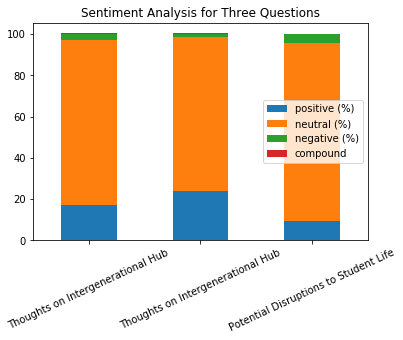

In [21]:
compiled_sentiment_df.plot.bar(stacked=True,rot=25, title="Sentiment Analysis for Three Questions");


### WORD CLOUD

In [22]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 

def wordcloud_sentiment(data):
    clean_data=[]
    clean_data_str=''
    x= train_data[str(data)]
    for i in x:
        if len(i)>4:
            clean_data.append(i.lower())
    clean_data_str = ' '.join(sentence for sentence in clean_data)
    #print(clean_data_str)
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 15).generate(clean_data_str)
    # plot the WordCloud image                        
    plt.figure(figsize = (7, 7), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 
    return

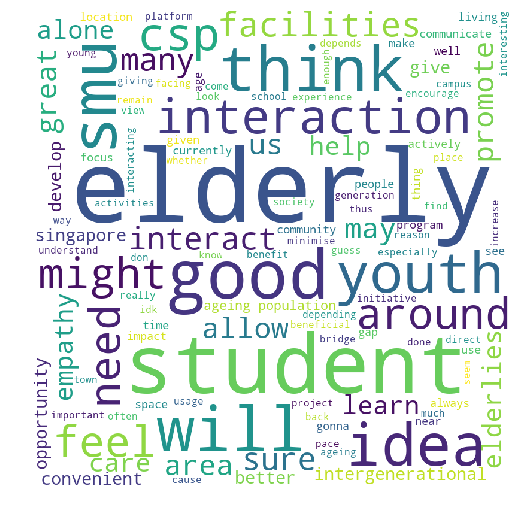

In [23]:
wordcloud_sentiment('further_thoughts')

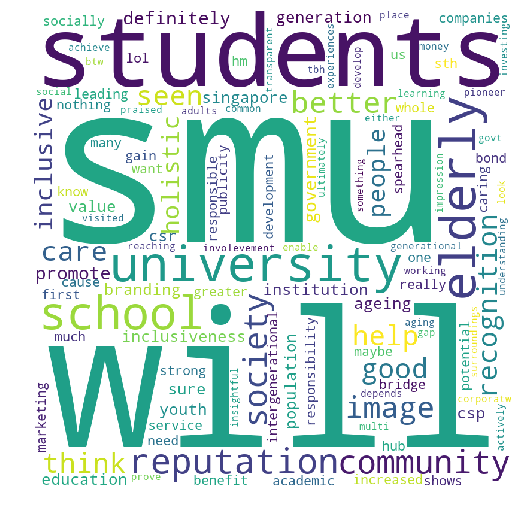

In [24]:
wordcloud_sentiment('branding_smu')

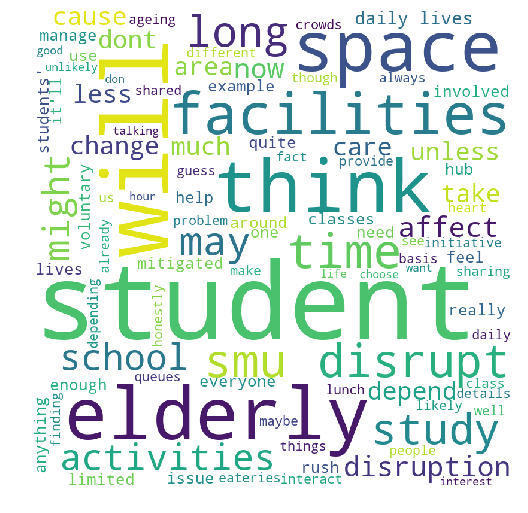

In [25]:
wordcloud_sentiment('disrupt_reason')